In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

%matplotlib inline

In [4]:
November = pd.read_csv('November_Cleaned.csv')

In [5]:
November[November['Pickup_Time'].str.contains(r'(2017-11-23).*')].to_csv('Nov_Holiday_1.csv')

/Users/TekendraMBP/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [6]:
November[November['Pickup_Time'].str.contains(r'(2017-11-22).*')].to_csv('Nov_Holiday_2.csv')

/Users/TekendraMBP/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [7]:
November[November['Pickup_Time'].str.contains(r'(2017-11-24).*')].to_csv('Nov_Holiday_3.csv')

/Users/TekendraMBP/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [8]:
November[November['Pickup_Time'].str.contains(r'(2017-11-25).*')].to_csv('Nov_Holiday_4.csv')

/Users/TekendraMBP/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [9]:
November[November['Pickup_Time'].str.contains(r'(2017-11-26).*')].to_csv('Nov_Holiday_5.csv')

/Users/TekendraMBP/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [10]:
November_1 = pd.read_csv('Nov_Holiday_1.csv')
November_2 = pd.read_csv('Nov_Holiday_2.csv')
November_3 = pd.read_csv('Nov_Holiday_3.csv')
November_4 = pd.read_csv('Nov_Holiday_4.csv')
November_5 = pd.read_csv('Nov_Holiday_5.csv')


In [11]:
frames = [November_1 , November_2 , November_3 , November_4 , November_5]

In [22]:
November_Holidays_Master = pd.concat(frames)

In [23]:
November_Holidays_Master.drop(columns='Unnamed: 0' , inplace=True)

In [27]:
def tip_percentage_calculator(row):
    try:
        return row['tip_amount'] / row['fare_amount'] * 100
    except:
        return 0
    

In [28]:
November_Holidays_Master['Percentage_Tip'] = November_Holidays_Master.apply(tip_percentage_calculator , axis=1)

In [36]:
November_Holidays_Master = November_Holidays_Master[November_Holidays_Master['trip_distance'] > 1]

In [37]:
November_Holidays_Master.groupby('Pickup_Borough').Percentage_Tip.mean()

Pickup_Borough
Bronx            13.596304
Brooklyn         19.933163
EWR              13.411765
Manhattan        20.478388
Queens           20.635473
Staten Island    24.536873
Name: Percentage_Tip, dtype: float64

In [38]:
November_Holidays_Master[November_Holidays_Master['Pickup_Borough'] == 'EWR']

,VendorID,Pickup_Time,DropOff_Time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,total_amount,Pickup_Location_ID,Pickup_Borough,Pickup_Zone,Pickup_Service_Zone,DropOff_Location_ID,DropOff_Borough,DropOff_Zone,DropOff_Service_Zone,Percentage_Tip
59695,1,2017-11-23 08:29:38,2017-11-23 08:34:54,4,1.7,standard_rate,N,credit_card,7.0,0.0,...,7.8,1,EWR,Newark Airport,EWR,1,EWR,Newark Airport,EWR,0.000000
177735,1,2017-11-22 05:20:11,2017-11-22 05:49:58,1,14.8,standard_rate,N,credit_card,42.5,0.5,...,68.4,1,EWR,Newark Airport,EWR,148,Manhattan,Lower East Side,Yellow Zone,26.823529


Holiday Tips November

Pickup_Borough

Bronx            13.596304

Brooklyn         19.933163

EWR              13.411765

Manhattan        20.478388

Queens           20.635473

Staten Island    24.536873


January Tips


Pickup_Borough

Bronx            17.921727

Brooklyn         21.529412

EWR              21.627907

Manhattan        21.684211

Queens           22.222222

Staten Island    21.561905


In [40]:
November_Holidays_Master.to_csv('November_Holidays_Master.csv')

Text(0,0.5,'Average Tip Percentage')

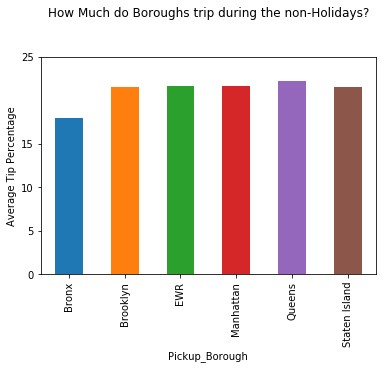

In [68]:
January = pd.read_csv('taxi_january_standard_rate.csv')

plt.style.use('fast')


ax = January.groupby('Pickup_Borough').Percentage_Tip.median().plot(kind='bar')

ax.set_title('How Much do Boroughs trip during the non-Holidays?' , pad=40)


ax.set_yticks([0 , 5 , 10 , 15 , 25])


ax.set_ylabel('Average Tip Percentage')

Text(0,0.5,'Average Tip Percentage')

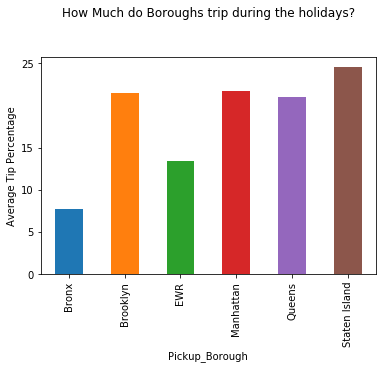

In [66]:
plt.style.use('fast')


ax = November_Holidays_Master.groupby('Pickup_Borough').Percentage_Tip.median().plot(kind='bar')

ax.set_title('How Much do Boroughs trip during the holidays?' , pad=40)


ax.set_yticks([0 , 5, 10 , 15 , 25])


ax.set_ylabel('Average Tip Percentage')

Text(0,0.5,'Average Tip Percentage')

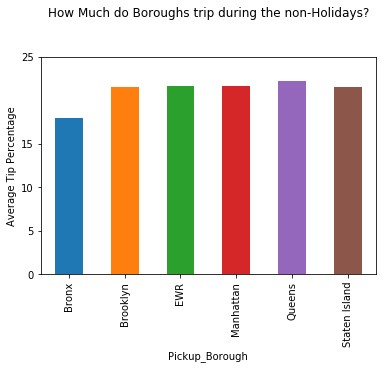

In [59]:
print('This is how much people trip during the non-holidays')
January.groupby('Pickup_Borough').Percentage_Tip.median()

This is how much people trip during the non-holidays


Pickup_Borough
Bronx            17.921727
Brooklyn         21.529412
EWR              21.627907
Manhattan        21.684211
Queens           22.222222
Staten Island    21.561905
Name: Percentage_Tip, dtype: float64

In [60]:
print('this is how much people tip during the holidays')

November_Holidays_Master.groupby('Pickup_Borough').Percentage_Tip.median()

this is how much people tip during the holidays


Pickup_Borough
Bronx             7.692308
Brooklyn         21.428571
EWR              13.411765
Manhattan        21.666667
Queens           21.019608
Staten Island    24.536873
Name: Percentage_Tip, dtype: float64

In [64]:
November_Holidays_Master.groupby('Pickup_Borough').trip_distance.median()

Pickup_Borough
Bronx             3.48
Brooklyn          3.30
EWR               8.25
Manhattan         2.10
Queens            9.78
Staten Island    11.47
Name: trip_distance, dtype: float64

In [65]:
January.groupby('Pickup_Borough').trip_distance.median()

Pickup_Borough
Bronx             3.39
Brooklyn          3.23
EWR               3.86
Manhattan         2.08
Queens           11.50
Staten Island     2.36
Name: trip_distance, dtype: float64